In [12]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'C:\Users\uvans\Downloads\archive (3).zip')
all_data=pd.DataFrame(data)
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
all_data.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [16]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [22]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [70]:
all_data['Order Date']=pd.DatetimeIndex(all_data['Order Date'])
all_data['Month']=pd.DatetimeIndex(all_data['Order Date']).month
all_data['Month'] = all_data['Month'].astype('int32')


In [71]:
all_data.dtypes

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [88]:

best_city = all_data.drop('Order Date', axis=1)
best_city


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [91]:
#What city sold the most product?
best_city.groupby(['City']).sum().sort_values(by='Sales',ascending=False)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,Hour
City,,,,,,,,,
San Francisco,372569180,10304443952,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91,643265
Los Angeles,247743297,6811084693,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80,427444
New York City,208439450,5736333884,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43,357696
Boston,165758780,4598265261,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01,288225
Atlanta,122928154,3423838407,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58,214264
Dallas,124308328,3415643578,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40,214390
Seattle,122394893,3406693974,Apple Airpods HeadphonesAA Batteries (4-pack)U...,16553,2733296.01,"174 Cedar St, Seattle, WA 98101162 Maple St, S...",104941,2747755.48,213292
Portland,104043698,2868861092,USB-C Charging CableUSB-C Charging CableUSB-C ...,14053,2307747.47,"928 12th St, Portland, OR 97035780 Elm St, Por...",87765,2320490.61,179632
Austin,82709457,2280982185,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75,141946


In [94]:

#What was the best month for sales? How much was earned that month?

best_city.groupby(['Month']).sum().sort_values(by='Sales',ascending=False)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,City,Hour
Month,,,,,,,,,
12,313688708,7685904705,Macbook Pro LaptopLG Washing MachineUSB-C Char...,28114,4588415.41,"136 Church St, New York City, NY 10001562 2nd ...",4613443.34,New York City New York City New York City San...,359978
10,206528743,5457110383,34in Ultrawide Monitor27in 4K Gaming MonitorAA...,22703,3715554.83,"609 Cherry St, Dallas, TX 75001225 5th St, Los...",3736726.88,Dallas Los Angeles New York City New York Cit...,290650
4,167977608,3387347100,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas Boston Los Angeles Los Angeles Los Ang...,262259
11,155210546,5047202573,Wired HeadphonesUSB-C Charging CableApple Airp...,19798,3180600.68,"46 Park St, New York City, NY 10001962 Hickory...",3199603.20,New York City Austin Los Angeles Seattle Bost...,254865
5,137829259,3345871523,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland San Francisco Boston Boston San Fran...,238780
3,115333587,2564810956,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco Portland San Francisco San Fran...,218969
7,102752005,3284139576,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta Seattle Atlanta Atlanta Seattle San F...,206169
6,92330356,2932976072,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26,San Francisco Dallas San Francisco San Franci...,195528
8,71824951,2899373917,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle Dallas Portland Los Angeles New York ...,172289


In [105]:
# What time should we display advertisements to maximize likelihood of customer's buying product?

all_data['Hour']=pd.DatetimeIndex(all_data['Order Date']).hour
all_data['Minute']=pd.DatetimeIndex(all_data['Order Date']).minute
best_time= all_data.drop('Order Date', axis=1)
best_time



,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1,1
1,1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3,1
2,2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21,1
3,3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13,1
4,4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2,1
185946,13618,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6,149.99,New York City,19,29,1
185947,13619,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,57,1
185948,13620,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,35,1


In [109]:
best_time.groupby(['Hour']).sum().sort_values(by='Sales',ascending=False)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
19,108164219,2977594958,AA Batteries (4-pack)USB-C Charging CableBose ...,14470,2398588.31,"866 Pine St, Boston, MA 02215780 Elm St, Portl...",91389,2412938.54,Boston Portland New York City Atlanta New Yor...,381042,12905
12,105185196,2904640163,USB-C Charging CableGoogle PhoneUSB-C Charging...,14202,2299876.68,"43 Hill St, Atlanta, GA 3030179 Elm St, Boston...",89161,2316821.34,Atlanta Boston Boston Boston Boston San Franc...,368679,12587
11,103670406,2860187075,AAA Batteries (4-pack)Apple Airpods Headphones...,14005,2288855.18,"77 7th St, Dallas, TX 75001546 Park St, Los An...",87654,2300610.24,Dallas Los Angeles San Francisco San Francisc...,368952,12411
20,100722125,2817372045,AAA Batteries (4-pack)Macbook Pro Laptop34in U...,13768,2268185.16,"599 Hill St, Los Angeles, CA 90001331 Madison ...",86375,2281716.24,Los Angeles New York City San Francisco New Y...,354086,12228
18,102613480,2825964832,USB-C Charging CableBose SoundSport Headphones...,13802,2207696.93,"277 Main St, New York City, NY 10001102 Johnso...",86421,2219348.30,New York City Los Angeles Dallas Seattle Aust...,371688,12280
13,101142166,2796951036,USB-C Charging CableLightning Charging CableAA...,13685,2139743.86,"594 1st St, San Francisco, CA 94016252 Hickory...",85808,2155389.80,San Francisco San Francisco San Francisco Los...,351045,12129
17,90607932,2518339565,ThinkPad LaptopLightning Charging CableLightni...,12229,2116777.02,"410 Lincoln St, Los Angeles, CA 90001785 Chest...",77454,2129361.61,Los Angeles San Francisco Dallas San Francisc...,323428,10899
14,91009706,2534309930,Lightning Charging CableVareebadd PhoneUSB-C C...,12362,2072194.77,"338 Main St, Austin, TX 73301175 1st St, New Y...",77836,2083672.73,Austin New York City New York City Boston Dal...,322563,10984
21,91507010,2516707491,34in Ultrawide MonitorUSB-C Charging CableAppl...,12244,2030763.83,"432 1st St, Dallas, TX 75001949 Wilson St, Los...",77103,2042000.86,Dallas Los Angeles Boston San Francisco San F...,312062,10921


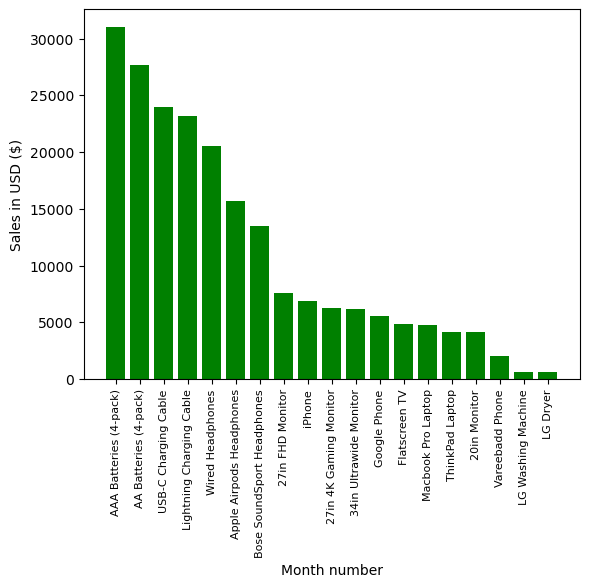

In [115]:
#What product sold the most


import matplotlib.pyplot as plt
PRODUCTS=best_time.groupby(['Product']).sum()['Quantity Ordered'].sort_values(ascending=False)
PRODUCT_NAME=PRODUCTS.index
PRODUCT_COUNT=PRODUCTS.values
plt.bar(PRODUCT_NAME,PRODUCT_COUNT,color='green')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(rotation='vertical', size=8)
plt.show()
